<a href="https://colab.research.google.com/github/Willlee0225/nbviewer/blob/master/%E5%9B%9E%E6%AD%B8%E5%88%86%E6%9E%90%E7%B0%A1%E6%98%93%E6%B8%AC%E8%A9%A6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 探究“學習時長”和“學習成績”之間是否存在相關性關係

In [0]:
import warnings
from collections import OrderedDict
import pandas as pd
import numpy as np
warnings.filterwarnings('ignore')

In [0]:
#建立資料並檢視資料
examscores={'學習時間':list(np.arange(0.5,5.5,0.25)),
           '學習成績':[8,  22,  13,  43,  20,  22,  33,  50,  62,  
              48,  55,  75,  62,  73,  81,  76,  64,  82,  90,  93]}
examOrderedDict=OrderedDict(examscores)
examDf=pd.DataFrame(examOrderedDict)
examDf.head()
#檢視資料描述統計資訊
examDf.describe()


,學習時間,學習成績
count,20.00000,20.000000
mean,2.87500,53.600000
std,1.47902,26.613016
min,0.50000,8.000000
25%,1.68750,30.250000
50%,2.87500,58.500000
75%,4.06250,75.250000
max,5.25000,93.000000


## 提取特徵值和標籤

In [0]:
X=examDf['學習時間']
Y=examDf['學習成績']

In [0]:
import matplotlib.pyplot as plt

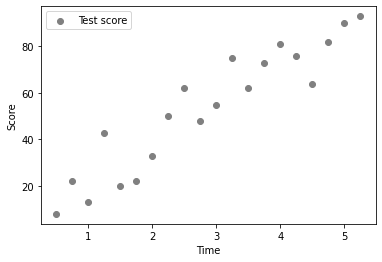

In [0]:
plt.scatter(X,Y,color='gray',label='Test score')
plt.legend(loc=2)
plt.xlabel('Time')
plt.ylabel('Score')
plt.show()

## 求相關係數

In [0]:
rDf=examDf.corr()
print(rDf)

          學習時間      學習成績
學習時間  1.000000  0.938007
學習成績  0.938007  1.000000


## 分割資料

In [0]:
from sklearn.model_selection import train_test_split
#建立訓練集和測試集資料
train_X,test_X,train_y,test_y =train_test_split(X,Y,train_size=0.8)
#輸出訓練集和測試集資料大小
print('訓練集大小',train_X.shape,train_y.shape)
print('測試集大小',test_X.shape,test_y.shape)

訓練集大小 (16,) (16,)
測試集大小 (4,) (4,)


## 建立回歸模型

In [0]:
from sklearn.linear_model import LinearRegression

In [0]:
model=LinearRegression()

In [0]:
train_X=train_X.values.reshape(-1,1)
train_y=train_y.values.reshape(-1,1)
test_X=test_X.values.reshape(-1,1)
test_y=test_y.values.reshape(-1,1)
print('訓練集大小',train_X.shape,train_y.shape)
print('測試集大小',test_X.shape,test_y.shape)
model.fit(train_X,train_y)

訓練集大小 (16, 1) (16, 1)
測試集大小 (4, 1) (4, 1)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [0]:
print('模型得分為',round(model.score(test_X,test_y),4))


模型得分為 0.6276


In [0]:
a=model.intercept_
b=model.coef_
print('模型的迴歸方程是:y=%f+%f x'%(a,b))

模型的迴歸方程是:y=5.980502+17.095538 x


## 繪製圖型以檢視

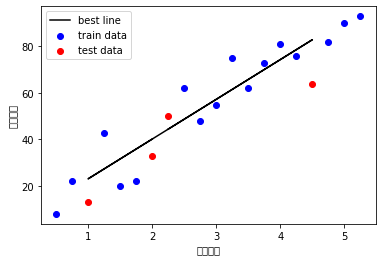

In [0]:
plt.scatter(train_X,train_y,color='b',label='train data')
test_y_pred=model.predict(test_X)
plt.plot(test_X,test_y_pred,color='black',label='best line')
plt.scatter(test_X,test_y,color='r',label='test data')
plt.xlabel('學習時間')
plt.ylabel('學習成績')
plt.legend(loc=2)
plt.show()